### Question 1

#### Using the HousePrices.csv data set, create a linear regression model of Price against SqFt, Bedrooms, Bathrooms, Brick, and Neighborhood as predictors. Examine the residual plots and conduct necessary tests to answer the following questions:

In [1]:
d<-read.csv("HousePrices.csv")

In [2]:
attach(d)

In [3]:
m1 <- lm(Price ~ SqFt + Bedrooms + Bathrooms + Brick + Neighborhood, data=d)

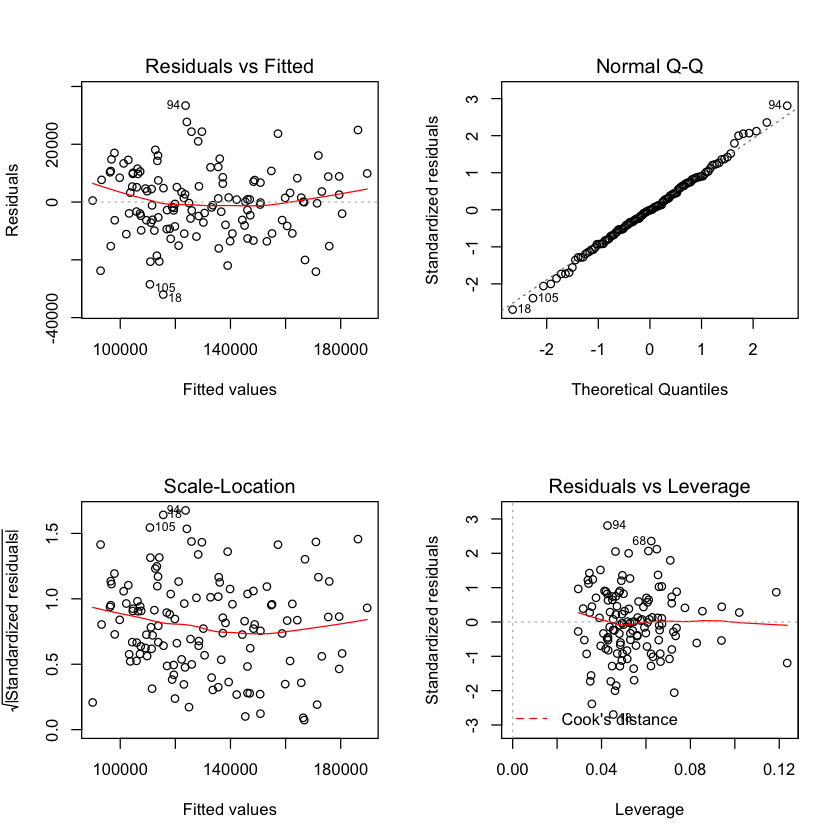

In [6]:
old.par <- par(mfrow=c(2, 2))
plot(m1)
par(old.par)

##### Multivariate normality?

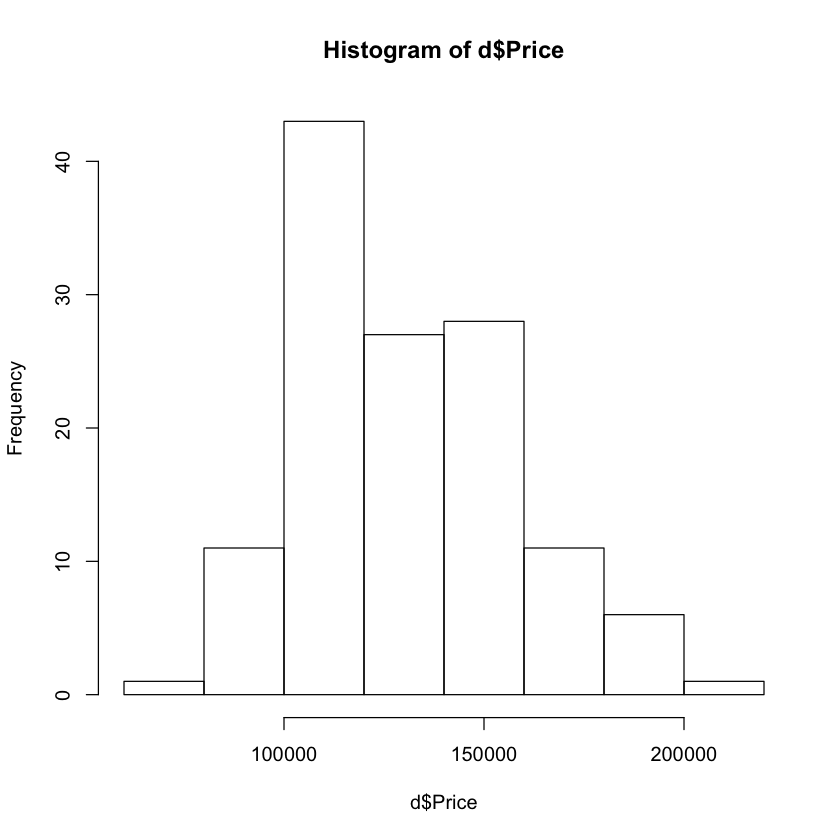

In [4]:
hist(d$Price)

The Y variable is normally distributed and also if we see the _Residual vs Fitted_ plot in the above chart, we can see that the residuals are fairly distributed near the mean in a range. So, the multivariate normality exists.

##### Linearity test

If we look at the Normal Q-Q plot we can say that the model passes the Linearity test.

##### Homoskedasticity?

As you can notice from the top-left plot, the red line is slightly curved and the residuals seem to increase as the fitted Y values increase. So, the inference here is, heteroscedasticity exists.

##### Mutlicolinearity Test

*library(car)*<br>
*vif(m1) # variance inflation factors*<br>
*sqrt(vif(m1)) > 2 # problem?*<br>

<style>
  table {margin-left: 0 !important;}
</style>

|             |GVIF    |Df |GVIF^(1/(2\*Df))|
|-------------|--------|---|:----------------|             
|SqFt         |FALSE |FALSE           |FALSE|
|Bedrooms     |FALSE |FALSE           |FALSE|
|Bathrooms    |FALSE |FALSE           |FALSE|
|Brick        |FALSE |FALSE           |FALSE|
|Neighborhood |FALSE |FALSE           |FALSE|

Looking at the above table we can see that the correlation matrix has the variance inflation factor less than 2 which is the acceptable limit for the multicolinearity.

##### Independence Assumption

The model may or may not fail the independence assumption because independence assumption depends on the way the data was gathered.

### Question 2

#### Consider the “Catalogs.csv” data set. Create a linear regression model of AmountSpent against Catalogs, Salary, Gender, Married, Children, Age, Location, and History as predictors. Analyze this model to answer the following questions.

In [5]:
d2<-read.csv("Catalogs.csv")

In [6]:
attach(d2)

In [7]:
ml2 <- lm(AmountSpent ~ Catalogs + Salary + Gender + Married + Children + Age + Location + History, data = d2)

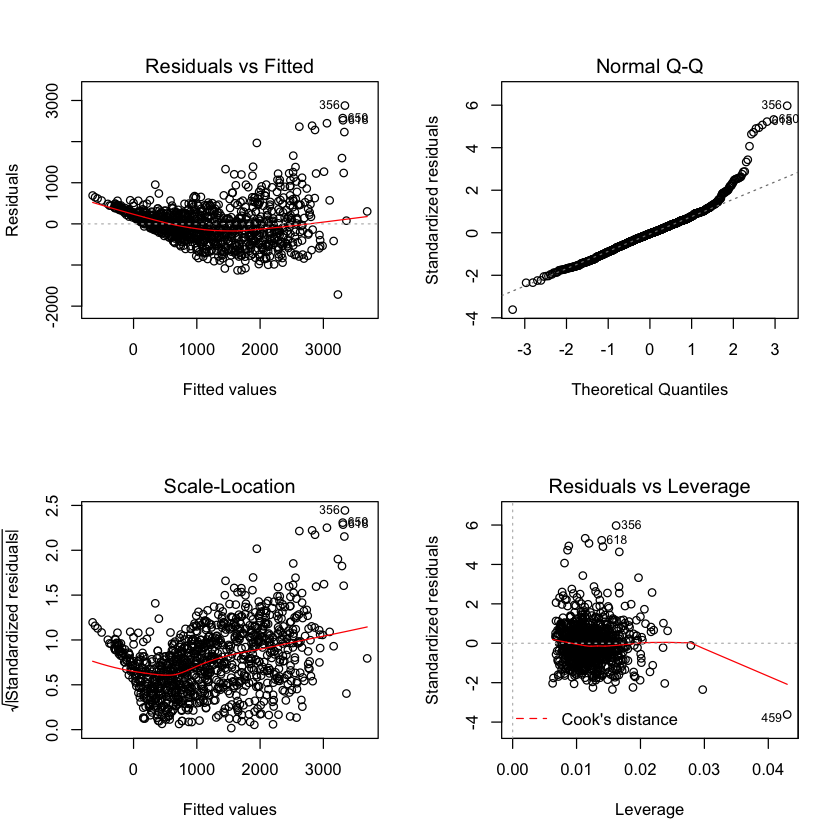

In [9]:
old.par <- par(mfrow=c(2, 2))
plot(ml2)
par(old.par)

##### Multivariate normality?

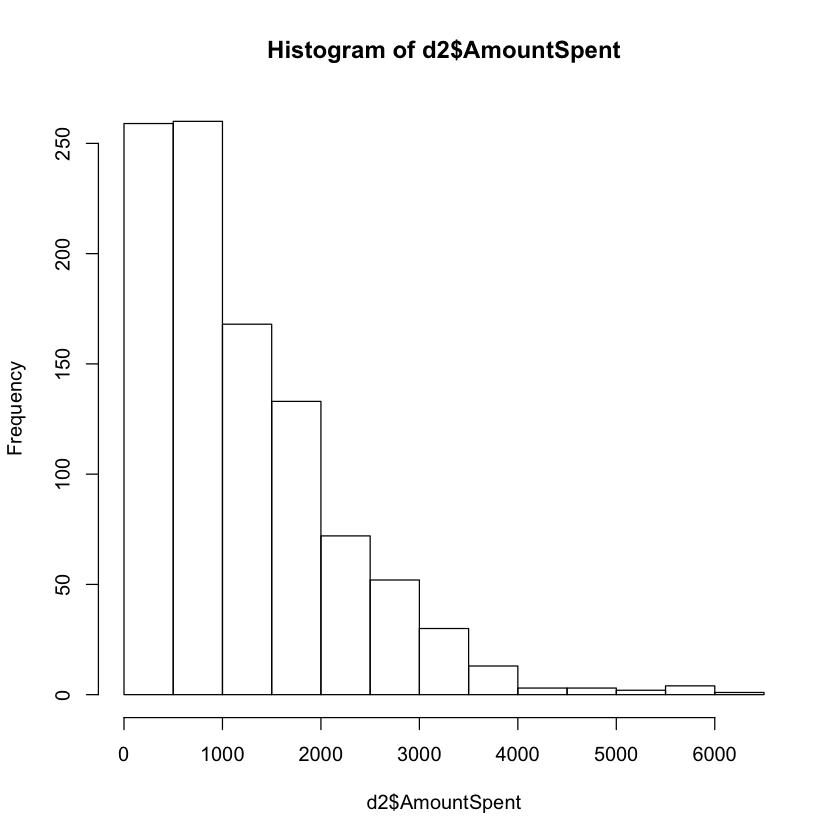

In [10]:
hist(d2$AmountSpent)

if Y is not somewhat normal, it is unlikely that Error will be normal. In this case AmountSpent is not normal so Error is unlikely to be normal. So Multivariate normality does not exist.

##### Homoskedasticity?

As you can notice from the top-left plot, the red line is curved and the residuals seem to increase as the fitted Y values increase. So, the inference here is, heteroscedasticity exists.

###### Linearity test

If we look at the Normal Q-Q plot above, we can see that the model fails to pass the linearity test.

##### Mutlicolinearity Test

library(car)<br>
vif(ml2) # variance inflation factors<br>
sqrt(vif(ml2)) > 2 # problem?<br>

|          |GVIF    |Df GVIF^(1/(2\*Df))|
|-------------|--------|---|:----------------| 
|Catalogs |FALSE |FALSE           |FALSE|
|Salary   | TRUE |FALSE           |FALSE|
|Gender   |FALSE |FALSE           |FALSE|
|Married  |FALSE |FALSE           |FALSE|
|Children |FALSE |FALSE           |FALSE|
|Age      |FALSE |FALSE           |FALSE|
|Location |FALSE |FALSE           |FALSE|
|History  |FALSE |FALSE           |FALSE|

Multicolinearity exists for the given model as we can see that the value for the Salary value is True.

##### Independence Assumption

The model may or may not fail the independence assumption because independence assumption depends on the way the data was gathered.

### Question 3

#### What are the problems that may occur if we fail to meet the above assumptions? If there are problems in either of the two models, what strategy can you recommend to modify the models in order to fit the requirements of regression models?


Whenever we violate any of the linear regression assumption, the regression coefficient produced by OLS will be either biased or variance of the estimate will be increased.

**Strategies to modify the models to fit the requirements**<br>

**If data is bimodal:**
- Break data up into two (or more) clusters.
- Alternatively, use mixed models.<br>

**If relationships are non-linear, or residuals are not normal (skewed):**
- Check for outliers.
- Transform data to see if the relationships may become more linear.
- Logarithmic transformation, Box-Cox transformation.<br>

**If residuals are heteroskedastic:**
- Logarithmic, square-root transformations often reduce the “fanning effect” by scaling down large values more relative to small values.
- Trial-and-error, gut feel, experience, domain knowledge, needed to find the right transformation. 
- If transformation does not work, we may have to go for non-linear (e.g., quadratic, spline) models.
- If it still does not work, we may have to account for omitted variables (endogeneity).